In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import states_pipeline
from scipy import stats

### Running example - S. aureus expression data set

The data set used in this example was taken from https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE16129
all the files used are in the example folder

#### Step 1

Reading the data files and formatting as a valid input for the pipeline

In [2]:
expression_table = pd.read_csv('example/s aureus expression.csv',index_col=0)

Create a list of controls

*Note that the control list should match the columns format


In [3]:
individuals = pd.read_csv('example/individuals_info.csv',index_col=0)

In [4]:
control_individuals = individuals[individuals['!Sample_source_name_ch1'] == 'PBMC_Healthy']['!Sample_geo_accession']
control_individuals #list of control individuals

PBMC Healthy Control INF 11N HG-U133A    GSM403284
PBMC Healthy Control INF 23N HG-U133A    GSM403304
PBMC Healthy Control INF 24N HG-U133A    GSM403312
PBMC Healthy Control INF 294 HG-U133A    GSM403322
PBMC Healthy Control INF 301 HG-U133A    GSM403326
PBMC Healthy Control INF 303 HG-U133A    GSM403328
PBMC Healthy Control INF 304 HG-U133A    GSM403330
PBMC Healthy Control INF 3N HG-U133A     GSM403411
PBMC Healthy Control INF 7N HG-U133A     GSM403546
PBMC Healthy Control INF 8N HG-U133A     GSM403551
Name: !Sample_geo_accession, dtype: object

*In this example, the controls are healthy individuals but you can use any group of individuals you want the states to be centered based on. For example: time 0 in time series data or patients who did not take any drug


#### Step 2: read the maps

In [5]:
T_R_map = pd.read_csv('resistance_tolerance_map.csv',index_col=0)
mets_SI_map = pd.read_csv('MetS_systemic_inflammation_map.csv',index_col=0)

#### Step 3: data preprocessing

In [6]:
expression_df = states_pipeline.expression_preproccesing(expression_table,control_individuals)

### Step 4: states calculation

In [7]:
r_t_states = states_pipeline.states_df(T_R_map,'T','R',expression_df)
mets_si_states = states_pipeline.states_df(mets_SI_map,'MetS','SI',expression_df)
full_states_table = r_t_states.join(mets_si_states)

lets see what we got

In [14]:
full_states_table

,T state,R state,pval T,pval R,MetS state,SI state,pval MetS,pval SI,R/SI balance score
individual,,,,,,,,,
GSM403282,1.874971,-0.070304,1.374340e-07,2.340323e-80,0.030162,1.721609,3.237093e-19,8.354465e-01,-1.791913
GSM403284,0.697094,-0.652146,3.664863e-03,1.139160e-27,0.682180,-0.510587,1.046635e-06,4.533459e-14,-0.141559
GSM403286,2.985380,0.110248,8.962615e-13,1.528181e-54,0.746839,5.902807,6.034198e-87,7.595334e-03,-5.792559
GSM403288,2.113140,4.989735,6.115751e-05,1.724262e-34,0.030377,5.129144,9.711531e-40,9.063974e-01,-0.139408
GSM403290,2.533135,4.578816,5.944721e-04,2.525650e-47,0.543712,7.234080,4.893973e-30,3.011190e-02,-2.655265
GSM403292,1.521042,3.385920,8.400378e-01,4.396774e-27,1.163744,4.645955,5.881093e-06,7.058150e-09,-1.260034
GSM403294,2.829155,3.414013,1.282948e-01,1.621348e-78,2.545019,5.180542,6.043918e-31,4.941474e-32,-1.766529
GSM403296,2.212143,0.794934,9.461312e-01,2.482682e-100,2.351390,2.058100,2.072661e-03,6.104897e-61,-1.263166
GSM403298,3.299972,4.370025,3.592240e-01,6.207431e-106,2.357673,5.753386,2.358232e-23,3.317379e-28,-1.383361


This is the states table for the T/R map and the MetS SI map with the corresponding p values. you can see how the calculation was done in the function state_pipline.states_df

#### Step 5: Standartization of the calculated levels based on the controls

This is an important step so that you could compare states for different maps (like SI and R later in the pipeline) and also to compare states from different data sets


In [9]:
full_states_table = states_pipeline.norm_all_states(full_states_table,control_individuals)

#### Step 6: R/SI balance score calculation

In [10]:
full_states_table = states_pipeline.R_SI_balance_score(full_states_table)

Now we have the final results. lets take a look:

In [19]:
full_states_table = pd.merge(full_states_table,individuals,left_index=True,right_on='!Sample_geo_accession')
full_states_table

,T state,R state,pval T,pval R,const T R map,MetS state,SI state,pval MetS,pval SI,const MetS SI map,...,!Sample_contact_email,!Sample_contact_institute,!Sample_contact_address,!Sample_contact_city,!Sample_contact_state,!Sample_contact_zip/postal_code,!Sample_contact_country,!Sample_supplementary_file,!Sample_data_row_count,!Sample_relation
PBMC S. aureus INF 109 HG-U133A,1.874971,-0.070304,1.374340e-07,2.340323e-80,-0.067617,0.030162,1.721609,3.237093e-19,8.354465e-01,-0.140356,...,DChaussabel@benaroyaresearch.org,Baylor Institute for Immunology Research,3434 Live Oak,Dallas,TX,75204,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM403n...,22283,Reanalyzed by: GSE122505
PBMC Healthy Control INF 11N HG-U133A,0.697094,-0.652146,3.664863e-03,1.139160e-27,0.024270,0.682180,-0.510587,1.046635e-06,4.533459e-14,0.047464,...,DChaussabel@benaroyaresearch.org,Baylor Institute for Immunology Research,3434 Live Oak,Dallas,TX,75204,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM403n...,22283,Reanalyzed by: GSE122505
PBMC S. aureus INF 150 HG-U133A,2.985380,0.110248,8.962615e-13,1.528181e-54,-0.178819,0.746839,5.902807,6.034198e-87,7.595334e-03,-0.601964,...,DChaussabel@benaroyaresearch.org,Baylor Institute for Immunology Research,3434 Live Oak,Dallas,TX,75204,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM403n...,22283,Reanalyzed by: GSE122505
PBMC S. aureus INF 179 HG-U133A,2.113140,4.989735,6.115751e-05,1.724262e-34,-0.090279,0.030377,5.129144,9.711531e-40,9.063974e-01,-0.368695,...,DChaussabel@benaroyaresearch.org,Baylor Institute for Immunology Research,3434 Live Oak,Dallas,TX,75204,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM403n...,22283,Reanalyzed by: GSE122505
PBMC S. aureus INF 205 HG-U133A,2.533135,4.578816,5.944721e-04,2.525650e-47,-0.078476,0.543712,7.234080,4.893973e-30,3.011190e-02,-0.308376,...,DChaussabel@benaroyaresearch.org,Baylor Institute for Immunology Research,3434 Live Oak,Dallas,TX,75204,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM403n...,22283,Reanalyzed by: GSE122505
PBMC S. aureus INF 208 HG-U133A,1.521042,3.385920,8.400378e-01,4.396774e-27,-0.003720,1.163744,4.645955,5.881093e-06,7.058150e-09,-0.097968,...,DChaussabel@benaroyaresearch.org,Baylor Institute for Immunology Research,3434 Live Oak,Dallas,TX,75204,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM403n...,22283,Reanalyzed by: GSE122505
PBMC S. aureus INF 216 HG-U133A,2.829155,3.414013,1.282948e-01,1.621348e-78,-0.029791,2.545019,5.180542,6.043918e-31,4.941474e-32,-0.268897,...,DChaussabel@benaroyaresearch.org,Baylor Institute for Immunology Research,3434 Live Oak,Dallas,TX,75204,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM403n...,22283,Reanalyzed by: GSE122505
PBMC S. aureus INF 220 HG-U133A,2.212143,0.794934,9.461312e-01,2.482682e-100,0.000911,2.351390,2.058100,2.072661e-03,6.104897e-61,-0.046947,...,DChaussabel@benaroyaresearch.org,Baylor Institute for Immunology Research,3434 Live Oak,Dallas,TX,75204,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM403n...,22283,Reanalyzed by: GSE122505
PBMC S. aureus INF 221 HG-U133A,3.299972,4.370025,3.592240e-01,6.207431e-106,-0.017923,2.357673,5.753386,2.358232e-23,3.317379e-28,-0.229243,...,DChaussabel@benaroyaresearch.org,Baylor Institute for Immunology Research,3434 Live Oak,Dallas,TX,75204,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM403n...,22283,Reanalyzed by: GSE122505
PBMC S. aureus INF 224 HG-U133A,2.186746,1.410400,8.224094e-01,1.717592e-83,0.003291,2.647991,2.695012,4.427217e-01,4.497289e-64,-0.012833,...,DChaussabel@benaroyaresearch.org,Baylor Institute for Immunology Research,3434 Live Oak,Dallas,TX,75204,USA,ftp://ftp.ncbi.nlm.nih.gov/geo/samples/GSM403n...,22283,Reanalyzed by: GSE122505


Now you can use your R/SI final score for some downstream analysis

<AxesSubplot: xlabel='!Sample_source_name_ch1', ylabel='R/SI balance score'>

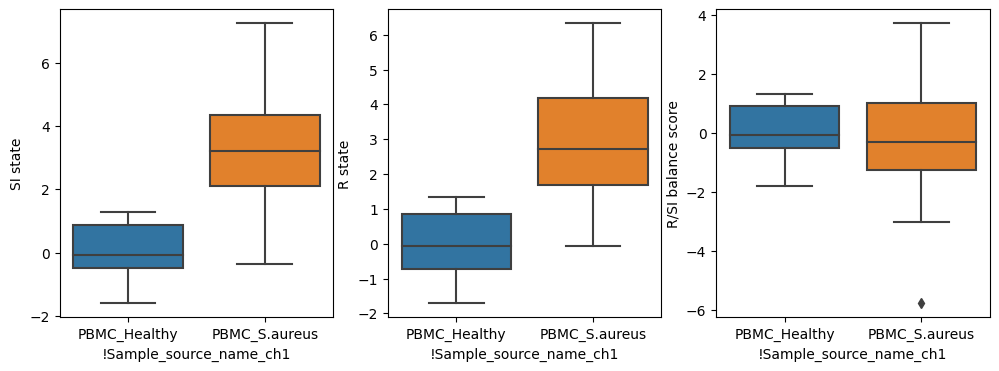

In [12]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize = (12,4))
sns.boxplot(data = full_states_table,y='SI state',x='!Sample_source_name_ch1',ax=ax1,order = ('PBMC_Healthy','PBMC_S.aureus')) #box plot the SI state of healthy controls and in s aureus patients
sns.boxplot(data = full_states_table,y='R state',x='!Sample_source_name_ch1',ax=ax2,order = ('PBMC_Healthy','PBMC_S.aureus')) #box plot the R state of healthy controls and in s aureus patients
sns.boxplot(data = full_states_table,y='R/SI balance score',x='!Sample_source_name_ch1',ax=ax3,order = ('PBMC_Healthy','PBMC_S.aureus')) #box plot the R/SI balance score of healthy controls and in s aureus patient

In [20]:
sick_states =full_states_table[full_states_table['!Sample_source_name_ch1'] == 'PBMC_S.aureus']
healthy_states =full_states_table[full_states_table['!Sample_source_name_ch1'] == 'PBMC_Healthy']

differential SI,R and R/SI balance score  (sick vs healthy individuals)

In [21]:
stats.ttest_ind(sick_states['SI state'],healthy_states['SI state'])

Ttest_indResult(statistic=5.9176000357840515, pvalue=2.3110137832428907e-07)

In [22]:
stats.ttest_ind(sick_states['R state'],healthy_states['R state'])

Ttest_indResult(statistic=5.639918840282906, pvalue=6.400184913458083e-07)

In [23]:
stats.ttest_ind(sick_states['R/SI balance score'],healthy_states['R/SI balance score'])

Ttest_indResult(statistic=-0.3876076055888322, pvalue=0.6998300884703385)

Here i did a simple analysis to compare the SI state, R state and R/SI balance score of healthy and sick individuals

#### Run the full pipeline

In this example ran the pipeline step by step to show how to use it flexibly (now you can use the states calculation on a different gene maps).
If you want to run the full pipeline easily you can simply use the function: full_R_SI_score_pipeline(expression_table,control_individuals) as follows:

In [16]:
full_states_table = states_pipeline.full_R_SI_score_pipeline(expression_table,control_individuals)
full_states_table

,T state,R state,pval T,pval R,MetS state,SI state,pval MetS,pval SI,R/SI balance score
individual,,,,,,,,,
GSM403282,1.874971,-0.070304,1.374340e-07,2.340323e-80,0.030162,1.721609,3.237093e-19,8.354465e-01,-1.791913
GSM403284,0.697094,-0.652146,3.664863e-03,1.139160e-27,0.682180,-0.510587,1.046635e-06,4.533459e-14,-0.141559
GSM403286,2.985380,0.110248,8.962615e-13,1.528181e-54,0.746839,5.902807,6.034198e-87,7.595334e-03,-5.792559
GSM403288,2.113140,4.989735,6.115751e-05,1.724262e-34,0.030377,5.129144,9.711531e-40,9.063974e-01,-0.139408
GSM403290,2.533135,4.578816,5.944721e-04,2.525650e-47,0.543712,7.234080,4.893973e-30,3.011190e-02,-2.655265
GSM403292,1.521042,3.385920,8.400378e-01,4.396774e-27,1.163744,4.645955,5.881093e-06,7.058150e-09,-1.260034
GSM403294,2.829155,3.414013,1.282948e-01,1.621348e-78,2.545019,5.180542,6.043918e-31,4.941474e-32,-1.766529
GSM403296,2.212143,0.794934,9.461312e-01,2.482682e-100,2.351390,2.058100,2.072661e-03,6.104897e-61,-1.263166
GSM403298,3.299972,4.370025,3.592240e-01,6.207431e-106,2.357673,5.753386,2.358232e-23,3.317379e-28,-1.383361
